# Antes de começar

1.   Organize as respostas do jeito que achar melhor, mas lembre-se que uma boa organização facilita a compreensão do código.

2.   Ao fim do teste, compartilhe a sua cópia do Notebook com a gente para realizarmos a correção.

3.   Boa sorte e divirta-se!

#Execute essa célula para configurar o ambiente.

In [16]:
# criar pasta
!mkdir prova_meliuz

# download do csv dentro da pasta
!curl "https://raw.githubusercontent.com/Crystian7/Programa-de-Estagio/main/Teste%20M%C3%A9liuz%20.csv" > prova_meliuz/Teste_Méliuz.csv

# importando o pandas
import pandas as pd

# carregando o arquivo csv e usando o parametro sep
df = pd.read_csv("/content/prova_meliuz/Teste_Méliuz.csv", sep=',')


mkdir: cannot create directory ‘prova_meliuz’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3416k  100 3416k    0     0  2408k      0  0:00:01  0:00:01 --:--:-- 2407k


Pergunta 1

Qual é a quantidade total de lojas na base de dados?

In [17]:
quantidade_total_lojas = df['Loja'].nunique()

print("A quantidade total de lojas na base de dados é:", quantidade_total_lojas)

A quantidade total de lojas na base de dados é: 15


Pergunta 2

Qual foi o total de GMV em cada região do país?

In [18]:
df['GMV'] = df['GMV'].astype(str)
df['GMV'] = df['GMV'].str.replace('R$', '', regex=False).str.replace(',', '', regex=False)

df['GMV'] = pd.to_numeric(df['GMV'], errors='coerce')

estado_regiao = {
    'Acre': 'Norte',
    'Alagoas': 'Nordeste',
    'Amapá': 'Norte',
    'Amazonas': 'Norte',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste',
    'Goiás': 'Centro-Oeste',
    'Maranhão': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Pará': 'Norte',
    'Paraíba': 'Nordeste',
    'Paraná': 'Sul',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio de Janeiro': 'Sudeste',
    'Rio Grande do Norte': 'Nordeste',
    'Rio Grande do Sul': 'Sul',
    'Rondônia': 'Norte',
    'Roraima': 'Norte',
    'Santa Catarina': 'Sul',
    'São Paulo': 'Sudeste',
    'Sergipe': 'Nordeste',
    'Tocantins': 'Norte'
}

df['Regiao'] = df['Estado'].map(estado_regiao)

total_gmv_por_regiao = df.groupby('Regiao')['GMV'].sum().apply(lambda x: f'R$ {x:.2f}')


print(total_gmv_por_regiao)

Regiao
Centro-Oeste    R$ 15481336.25
Nordeste        R$ 20093745.63
Norte           R$ 17639259.09
Sudeste         R$ 33231423.79
Sul             R$ 13745170.49
Name: GMV, dtype: object


Pergunta 3

Qual foi a comissão total de cada loja considerando as taxas?

In [19]:
def calcular_comissao(row):
    vendas = row['Quant. de Vendas']
    gmv = row['GMV']
    if vendas <= 10:
        return 0.05 * gmv
    elif vendas <= 15:
        return 0.10 * gmv
    elif vendas <= 20:
        return 0.15 * gmv
    elif vendas <= 25:
        return 0.20 * gmv
    else:
        return 0.25 * gmv

df['Comissao'] = df.apply(calcular_comissao, axis=1)

tabela_comissao_por_loja = df.groupby('Loja')['Comissao'].sum().apply(lambda x: f'R$ {x:.2f}').reset_index()

tabela_comissao_por_loja = tabela_comissao_por_loja.sort_values(by='Comissao', ascending=False)

print('Comissão total de cada loja considerando as taxas:')
print(tabela_comissao_por_loja)
print(df)

Comissão total de cada loja considerando as taxas:
          Loja      Comissao
11   Parceiro6  R$ 770374.90
12   Parceiro7  R$ 757970.45
10   Parceiro5  R$ 751974.62
7    Parceiro2  R$ 624274.36
9    Parceiro4  R$ 622076.86
0    Parceiro1  R$ 613968.08
8    Parceiro3  R$ 603660.86
3   Parceiro12  R$ 477180.56
1   Parceiro10  R$ 453773.61
2   Parceiro11  R$ 450281.55
4   Parceiro13  R$ 441711.95
13   Parceiro8  R$ 440638.51
14   Parceiro9  R$ 438576.91
6   Parceiro15  R$ 295500.08
5   Parceiro14  R$ 274894.75
             Data  Quant. de Vendas Forma de Pagamento        Loja      GMV  \
0        1/1/2020               1.0              TipoA   Parceiro5  3360.92   
1        1/1/2020               5.0              TipoB   Parceiro5   830.64   
2        1/1/2020               2.0              TipoB   Parceiro4  1625.44   
3        1/1/2020               2.0              TipoA   Parceiro6  1436.95   
4        1/1/2020               5.0              TipoB   Parceiro1  2776.41   
...        

Pergunta 4

Qual foi o GMV total entre os dias 09 de outubro a 23 de novembro ?

In [20]:
df['Data'] = pd.to_datetime(df['Data'])

data_inicio = pd.to_datetime('2020-10-09')
data_fim = pd.to_datetime('2020-10-23')

filtro = (df['Data'] >= data_inicio) & (df['Data'] <= data_fim)

gmv_total_filtro = df.loc[filtro, 'GMV'].sum()

print("O GMV total entre 09 de outubro e 23 de novembro foi:", ("R$ {:.2f}".format(gmv_total_filtro)))

O GMV total entre 09 de outubro e 23 de novembro foi: R$ 4183846.68


Pergunta 5

Qual foi a comissão total do primeiro trimestre? Considere as taxas de comissão da questão 3.

In [21]:
data_inicio = pd.to_datetime('2020-01-01')
data_fim = pd.to_datetime('2020-03-31')

filtro = (df['Data'] >= data_inicio) & (df['Data'] <= data_fim)

comissao_total_tri = df.loc[filtro, 'Comissao'].sum()

print("A comissão total no primeiro trimestre foi:", ("R$ {:.2f}".format(comissao_total_tri)))

A comissão total no primeiro trimestre foi: R$ 2003785.03


Pergunta 6

De todos os estados brasileiros, qual deles merece um acompanhamento melhor? porque ?

R.: Tocantins pois é o estado com menor faturamento anual e é necessario o acompanhamento em comparação com as estrategias dos estados top faturamento.

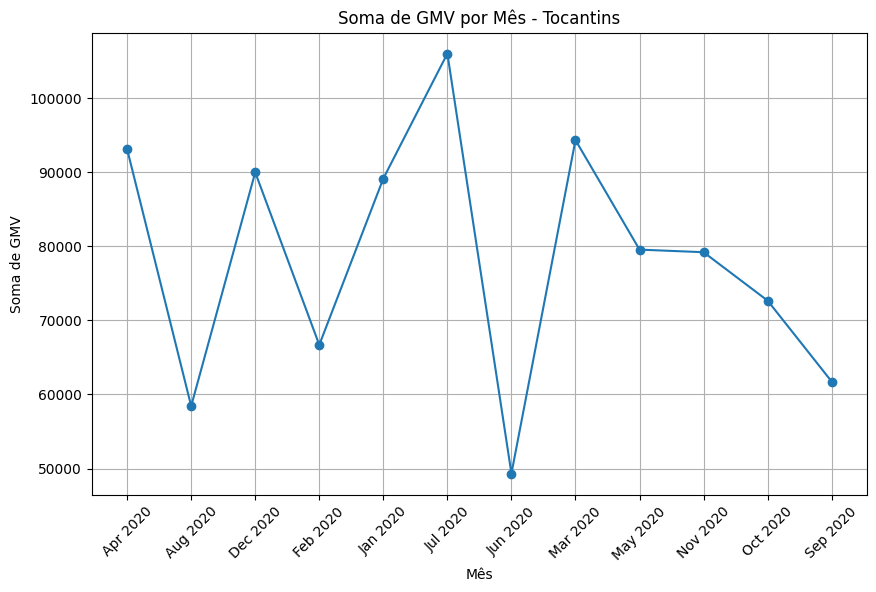

In [ ]:
#analise temporal

import matplotlib.pyplot as plt

estado_pior_gmv = df.groupby('Estado')['GMV'].sum().idxmin()

df_estado_pior_gmv = df[df['Estado'] == estado_pior_gmv].copy()

df_estado_pior_gmv['Data'] = pd.to_datetime(df_estado_pior_gmv['Data'])

df_estado_pior_gmv['Mês'] = df_estado_pior_gmv['Data'].dt.strftime('%b %Y')

soma_gmv_por_mes = df_estado_pior_gmv.groupby('Mês')['GMV'].sum()

plt.figure(figsize=(10, 6))
plt.plot(soma_gmv_por_mes.index, soma_gmv_por_mes.values, marker='o', linestyle='-')
plt.xlabel('Mês')
plt.ylabel('Soma de GMV')
plt.title(f'Soma de GMV por Mês - {estado_pior_gmv}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Pergunta 7

Em qual loja você faria uma campanha para o aumento das vendas? Porque?

R.: Parceiro 14. O Rio de Janeiro apresenta grande potencial de faturamento e as outras lojas no mesmo estado possuem um desempenho onde o Parceiro 14 pode alcançar com a campanha.

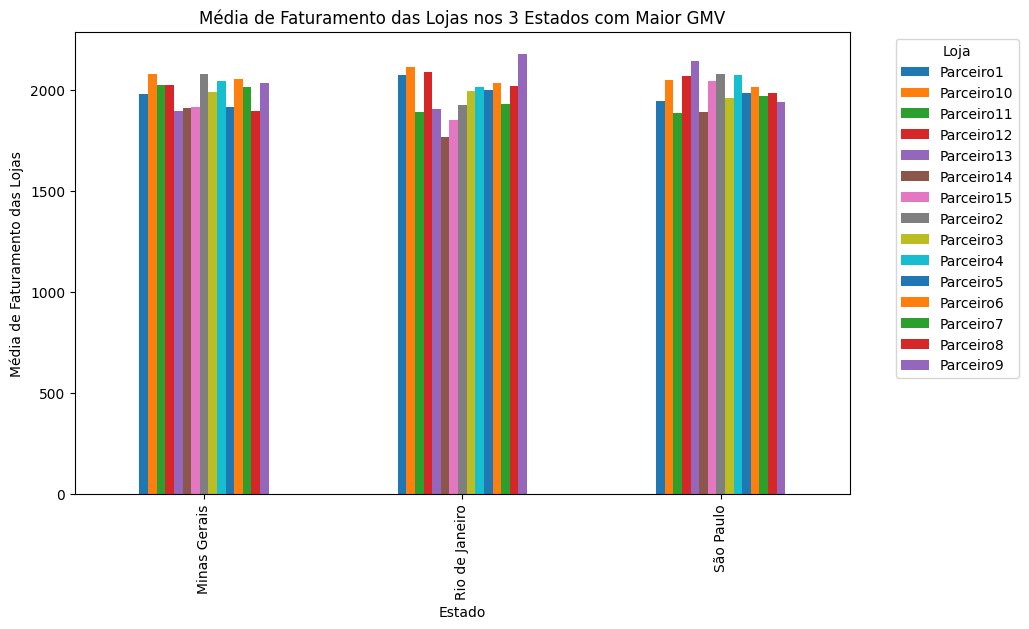

In [ ]:
top_estados_gmv = df.groupby('Estado')['GMV'].sum().nlargest(3).index
df_top_estados = df[df['Estado'].isin(top_estados_gmv)]
media_faturamento_lojas = df_top_estados.groupby(['Estado', 'Loja'])['GMV'].mean()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
media_faturamento_lojas.unstack().plot(kind='bar', ax=plt.gca())
plt.xlabel('Estado')
plt.ylabel('Média de Faturamento das Lojas')
plt.title('Média de Faturamento das Lojas nos 3 Estados com Maior GMV')
plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Pergunta 8

Quantas lojas tiveram vendas do tipo Promocional? E quantas de Não Promocional? Quais conclusões podemos tirar dessas vendas promocionais?

R.:

Número de vendas do tipo Promocional: 6671 e Número de vendas do tipo Não Promocional: 41083.

As vendas promocionais representam uma parte significativa do total de vendas, com 6.671 vendas promocionais em comparação com 41.083 vendas não promocionais. Isso indica que as vendas promocionais desempenham um papel importante no volume de vendas e captação de clientes.

In [ ]:
contagem_tipo_vendas = df['Tipo de Vendas'].value_counts()

print("Número de vendas do tipo Promocional:", contagem_tipo_vendas['Promocional'])
print("Número de vendas do tipo Não Promocional:", contagem_tipo_vendas['Não Promocional'])

Número de lojas com vendas do tipo Promocional: 6671
Número de lojas com vendas do tipo Não Promocional: 41083


Pergunta 9

Qual foi o GMV total e a comissão total da região nordeste?


In [ ]:
df_nordeste = df[df['Regiao'] == 'Nordeste']

# Calcular o GMV total da região Nordeste
gmv_total_nordeste = df_nordeste['GMV'].sum()

# Calcular a comissão total da região Nordeste
comissao_total_nordeste = df_nordeste['Comissao'].sum()

print("GMV Total da Região Nordeste:", ("R$ {:.2f}".format(gmv_total_nordeste)) )
print("Comissão Total da Região Nordeste:", ("R$ {:.2f}".format(comissao_total_nordeste)) )

GMV Total da Região Nordeste: R$ 20093745.63
Comissão Total da Região Nordeste: R$ 1730827.89


Pergunta 10

Qual a média de vendas por loja, por estado, e pelo tipo de vendas.

In [ ]:
# Média de vendas por loja
media_vendas_por_loja = df.groupby('Loja')['Quant. de Vendas'].mean().apply(lambda x: f'{x:.2f}')

# Média de vendas por estado
media_vendas_por_estado = df.groupby('Estado')['Quant. de Vendas'].mean().apply(lambda x: f'{x:.2f}')

# Média de vendas por tipo de vendas
media_vendas_por_tipo = df.groupby('Tipo de Vendas')['Quant. de Vendas'].mean().apply(lambda x: f'{x:.2f}')

# Exibindo os resultados
print("Média de Vendas por Loja:")
print(media_vendas_por_loja)

print("\nMédia de Vendas por Estado:")
print(media_vendas_por_estado)

print("\nMédia de Vendas por Tipo de Vendas:")
print(media_vendas_por_tipo)

Média de Vendas por Loja:
Loja
Parceiro1      7.88
Parceiro10    10.18
Parceiro11    10.39
Parceiro12    10.44
Parceiro13    10.19
Parceiro14    10.36
Parceiro15    10.85
Parceiro2      8.06
Parceiro3      7.84
Parceiro4      7.81
Parceiro5      8.06
Parceiro6      8.22
Parceiro7      8.17
Parceiro8     10.16
Parceiro9     10.13
Name: Quant. de Vendas, dtype: object

Média de Vendas por Estado:
Estado
Acre                   10.30
Alagoas                10.78
Amapá                  10.50
Amazonas               10.43
Bahia                  10.79
Ceará                  10.52
Distrito Federal        6.58
Espírito Santo         10.47
Goiás                   8.99
Maranhão                8.72
Mato Grosso             9.02
Mato Grosso do Sul     10.63
Minas Gerais            7.87
Paraná                  8.91
Paraíba                 8.43
Pará                   10.63
Pernambuco             10.61
Piauí                   9.11
Rio Grande do Norte     9.17
Rio Grande do Sul       6.67
Rio de Janeiro 

Pergunta 11

Qual foi a forma de pagamento mais utilizada? E o GMV total gerado por ela?

In [ ]:
forma_pagamento_mais_utilizada = df['Forma de Pagamento'].value_counts().idxmax()

gmv_total_forma_pagamento_mais_utilizada = df[df['Forma de Pagamento'] == forma_pagamento_mais_utilizada]['GMV'].sum()

print("Forma de Pagamento Mais Utilizada:",  forma_pagamento_mais_utilizada)
print("GMV Total Gerado por Essa Forma de Pagamento:", ("R$ {:.2f}".format(gmv_total_forma_pagamento_mais_utilizada)) )

Forma de Pagamento Mais Utilizada: TipoB
GMV Total Gerado por Essa Forma de Pagamento: R$ 46764677.18


Pergunta 12

Quais outras informações podemos extrair através da base de dados da planilha?

R.: Podemos realizar varios tipos de analise como identificar as lojas com melhor e pior desempenho em termos de vendas, GMV e comissões, comparar o desempenho das lojas em diferentes estados ou regiões, identificar quais tipos de promoções são mais eficazes e em quais epocas do ano podemos aplicar para maior desempenho entre outros insights por meio dos dados.